In [1]:
from stable_baselines3 import DDPG, DQN, A2C
from Landscape import Region
from enviorment import GPSD_ENV
from stable_baselines3.common.noise import NormalActionNoise
import numpy as np 
import torch 
from stable_baselines3.dqn.policies import QNetwork
from stable_baselines3.common.env_checker import check_env



/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### LOAD IN

/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/ethanweilheimer/school/research/gpd-denied-navigation/src/Landscape.py:27: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrad

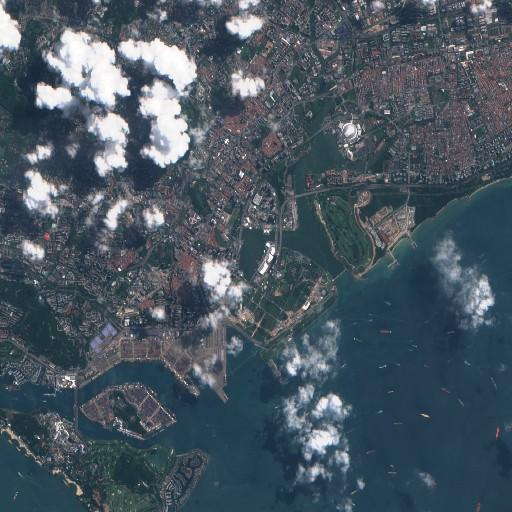

In [2]:
landscape = Region((103.809643,1.243246,103.904400,1.325623), hex_size=25) 
landscape.images[2018].Input_Image.image

In [3]:
import importlib
import Landscape
import enviorment 
import stable_baselines3
import tracker
from stable_baselines3.common.vec_env import VecFrameStack
from gym.wrappers import GrayScaleObservation
Landscape = importlib.reload(Landscape)
enviorment = importlib.reload(enviorment)
tracker = importlib.reload(tracker)


stable_baselines3 = importlib.reload(stable_baselines3)
mode = 'RGB'
track = tracker.Tracker(landscape.images[2016].Input_Image.num_hexes_width,landscape.images[2016].Input_Image.num_hexes_height)
env = enviorment.GPSD_ENV(landscape.images[2016], start_position=None, target_position=[3,3], tracker = track, mode = mode)

check_env(env, warn=True)

/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### TRAIN

In [ ]:
import math
from stable_baselines3.common.vec_env import VecNormalize, DummyVecEnv
track.clear()
offset = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# # # Create the model
# vec_env = DummyVecEnv([lambda: env])  # Create a DummyVecEnv

# # # Optionally normalize the environment (set normalize_images=False)
# normalized_env = VecNormalize(vec_env, norm_obs=True, norm_reward=True, clip_obs=10.0)
sucesses = []
rewards = []
runs = []
for i in range(50):
      model = DQN(
      policy="CnnPolicy",
      env=env,
      learning_rate=1e-4,
      buffer_size=1000,
      batch_size=32,
      gamma=0.99,
      exploration_initial_eps=0,
      exploration_final_eps=0,
      exploration_fraction=0,
      target_update_interval=1000,
      learning_starts=1000,
      max_grad_norm=10,
      train_freq=10,
      verbose=0,
      policy_kwargs=dict(normalize_images=False)
      )

      model.learn(total_timesteps=10000, progress_bar = True)
      model.save(f"models/model{i}")
      vals = []
      suc = []
      for i in range(100):
            env.reset()
            terminated = False
            run_reward = 0
            while not terminated:
                  action = model.predict(env._get_obs())
                  observation, reward, terminated, k, info  = env.step(int(action[0]))
                  run_reward += reward
            vals.append(run_reward)
            suc.append(info['SUCESS'])
      sucesses.append(np.asarray(run_reward).mean())
      rewards.append(np.asarray(suc).mean())
      runs.append(i*10000)



Output()

Using device: cpu


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

### Train Tracker 

#### Times Visited

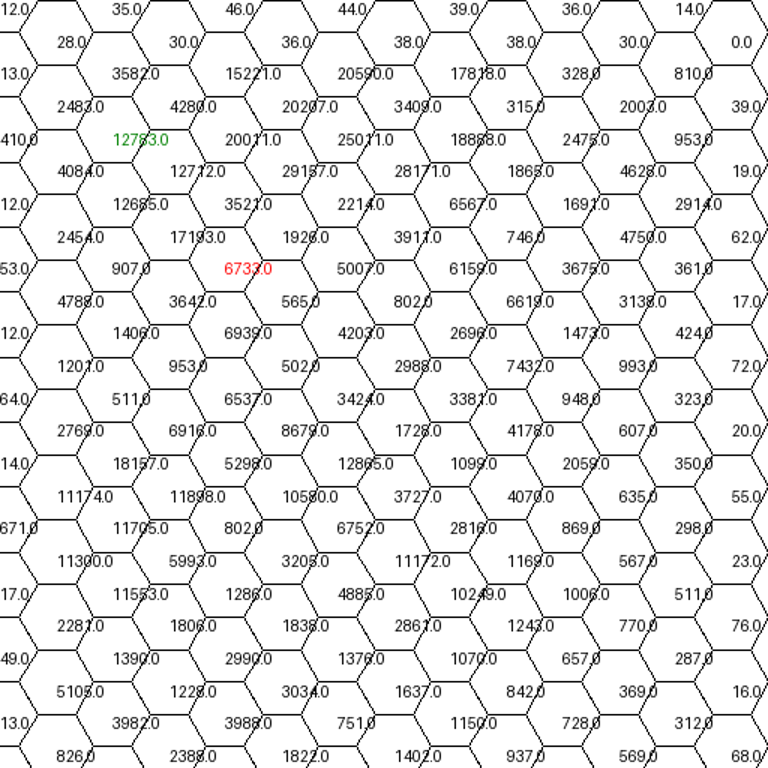

In [45]:

from PIL import Image, ImageDraw
from helper import hex_corner
img = Image.new('RGB',(env.area.Input_Image.image.size), color= 'white')
draw = ImageDraw.Draw(img)
for q in range(env.size_height+1):
      for r in range(env.size_width+1):
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            val = round(track.arr[r,q],2)
            draw.polygon(corners, outline="black")
            if( (r,q) == (1+offset,1+offset)):
                  draw.text((x,y), str(val), fill='green', align='left')
            elif((r,q) == (3+offset,3+offset)):
                  draw.text((x,y), str(val), fill='red', align='left')
            else:
                  draw.text((x,y), str(val), fill='black', align='left')
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))
      

#### REWARD BACK TRACKED

/var/folders/2v/9rjk2f_n3pgd38k9vyj_8_tw0000gn/T/ipykernel_52212/2182963252.py:3: RuntimeWarning: invalid value encountered in divide
  rew = track.reward_back / track.arr


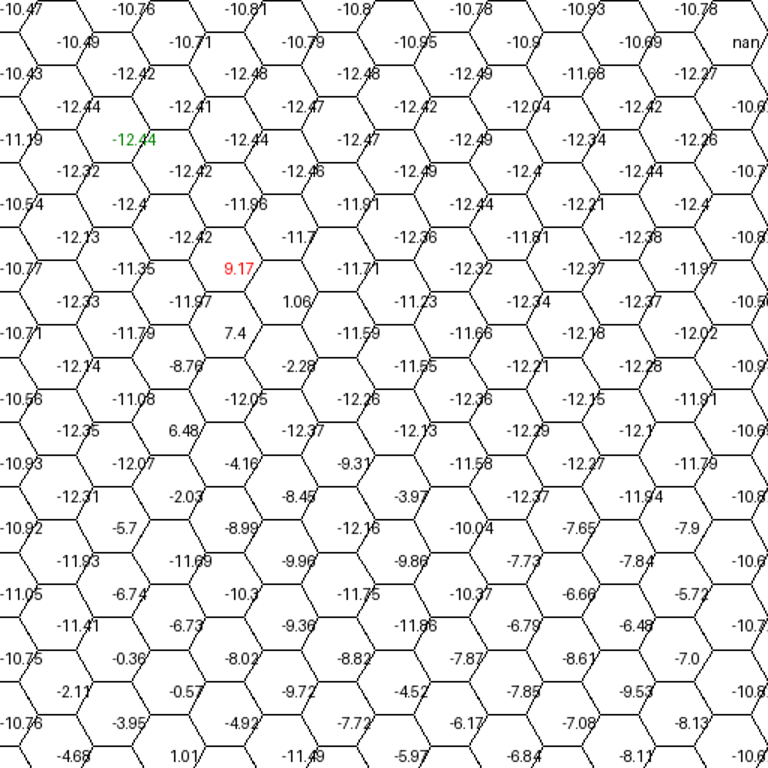

In [46]:

from PIL import Image, ImageDraw
from helper import hex_corner
rew = track.reward_back / track.arr
img = Image.new('RGB',(env.area.Input_Image.image.size), color= 'white')
draw = ImageDraw.Draw(img)
for q in range(env.size_height+1):
      for r in range(env.size_width+1):
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            val = round(rew[r,q],2)
            draw.polygon(corners, outline="black")
            if( (r,q) == (1+offset,1+offset)):
                  draw.text((x,y), str(val), fill='green', align='center')
            elif((r,q) == (3+offset,3+offset)):
                  draw.text((x,y), str(val), fill='red', align='center')
            else:
                  draw.text((x,y), str(val), fill='black', align='center')
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))
      

#### TIMES STARTED AT

/var/folders/2v/9rjk2f_n3pgd38k9vyj_8_tw0000gn/T/ipykernel_52212/2107939854.py:3: RuntimeWarning: invalid value encountered in divide
  rew = track.reward_back / track.arr


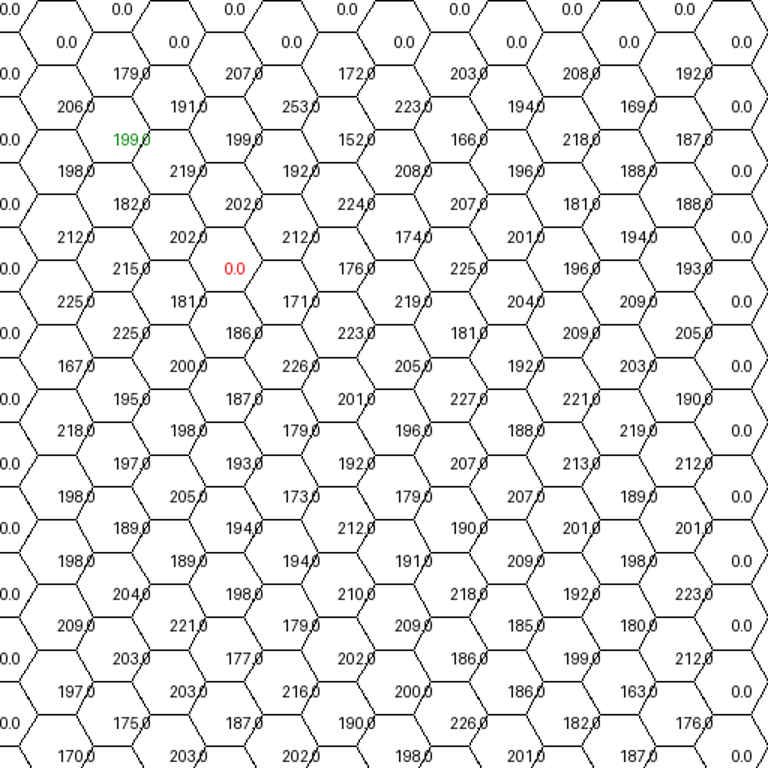

In [47]:

from PIL import Image, ImageDraw
from helper import hex_corner
rew = track.reward_back / track.arr
img = Image.new('RGB',(env.area.Input_Image.image.size), color= 'white')
draw = ImageDraw.Draw(img)
for q in range(env.size_height+1):
      for r in range(env.size_width+1):
      
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            val = round(track.start[r,q],2)
            draw.polygon(corners, outline="black")
            if( (r,q) == (1+offset,1+offset)):
                  draw.text((x,y), str(val), fill='green', align='center')
            elif((r,q) == (3+offset,3+offset)):
                  draw.text((x,y), str(val), fill='red', align='center')
            else:
                  draw.text((x,y), str(val), fill='black', align='center')
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))
      

## Metrics

In [87]:
# model = DQN.load('DQN_SOFTMAX_WITH_NEW_PARAMS_SMALL_TRAIN.zip')
model = DQN.load('DQN_SOFTMAX_WITH_NEW_PARAMS.zip')
mode = 'RGB'
env = enviorment.GPSD_ENV(landscape.images[2018], start_position=None, target_position=[3,3], tracker = track, mode = mode)


In [88]:
offset = 1

#### PREDICTED DIRECTION

/var/folders/2v/9rjk2f_n3pgd38k9vyj_8_tw0000gn/T/ipykernel_52212/4132988312.py:3: RuntimeWarning: invalid value encountered in divide
  rew = track.reward_back / track.arr


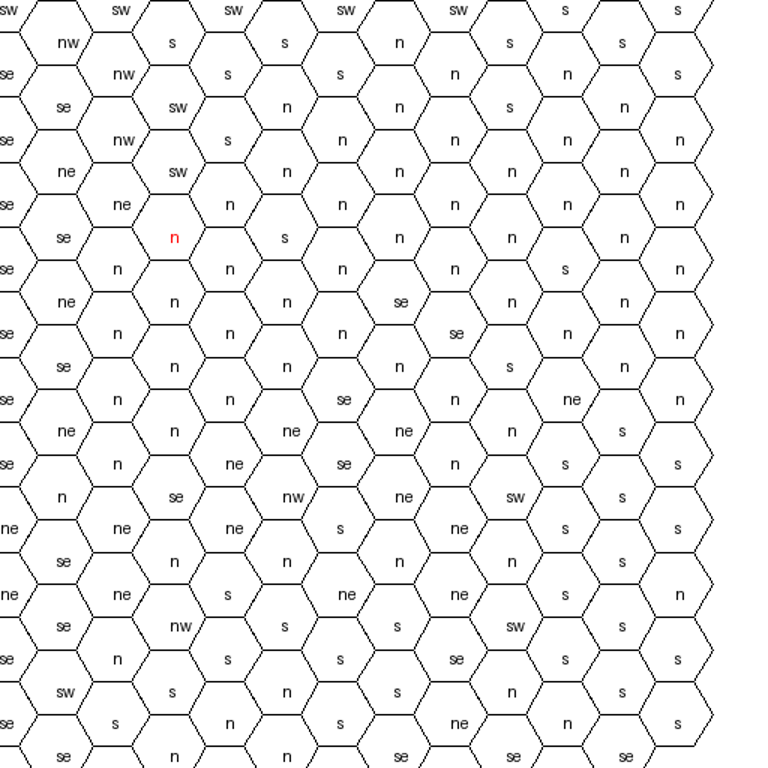

In [89]:

from PIL import Image, ImageDraw
from helper import hex_corner
rew = track.reward_back / track.arr
img = Image.new('RGB',(env.area.Input_Image.image.size), color= 'white')
draw = ImageDraw.Draw(img)
for q in range(env.size_height):
      for r in range(env.size_width):
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            
            hold = np.array(env.area.Input_Image.hexagon_images[q][r].cropped_image.convert(mode))
            if(mode =='L'):
                  hold = np.array(env.area.Input_Image.hexagon_images[q][r].cropped_image.convert(mode)).reshape((1,hold.shape[0],hold.shape[1]))
            val = 0
            for i in range(10):
                  val += model.predict(hold)[0]
            val = round(val/10)
      
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            draw.polygon(corners, outline="black")
            if (val == 0):
                  val = 'ne'
            elif (val == 1):
                  val = 'se'
            elif (val == 2):
                  val = 'nw'
            elif (val == 3):
                  val = 'sw'
            elif (val == 4):
                  val = 's'
            elif (val == 5):
                  val = 'n'
            # if( (r,q) == (1,1)):
            #       draw.text((x,y), str(val), fill='green', align='center')
            if((r,q) == (3,3)):
                  draw.text((x,y), str(val), fill='red', align='center')
            else:
                  draw.text((x,y), str(val), fill='black', align='center')
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))
      

#### SUCESS METRICS

In [90]:
vals = []
suc = []
for i in range(1000):
      env.reset()
      terminated = False
      run_reward = 0
      while not terminated:
            action = model.predict(env._get_obs())
            observation, reward, terminated, k, info  = env.step(int(action[0]))
            run_reward += reward
      vals.append(run_reward)
      suc.append(info['SUCESS'])
np.asarray(suc).mean(), np.asarray(run_reward).mean(), np.asarray(run_reward).min(), np.asarray(run_reward).max()


(0.884, 9.3, 9.3, 9.3)

#### SUCCESS FROM EACH STARTING POINT

In [96]:
rew = np.zeros((env.size_height, env.size_width))
sucesses = np.zeros((env.size_height, env.size_width))
for y in range(env.size_height):
      for x in range(env.size_width):
            env = enviorment.GPSD_ENV(landscape.images[2016], start_position=[y,x], target_position=[3,3], tracker = track, mode=mode)
            
            for i in range (10):
                  env.reset()
                  terminated = False
                  run_reward = 0
                  while not terminated:
                        action = model.predict(env._get_obs())
                        observation, reward, terminated, k, info  = env.step(int(action[0]))
                  sucesses[y][x] += (info['SUCESS'])
                  rew[y][x] += reward
                  
                  
      

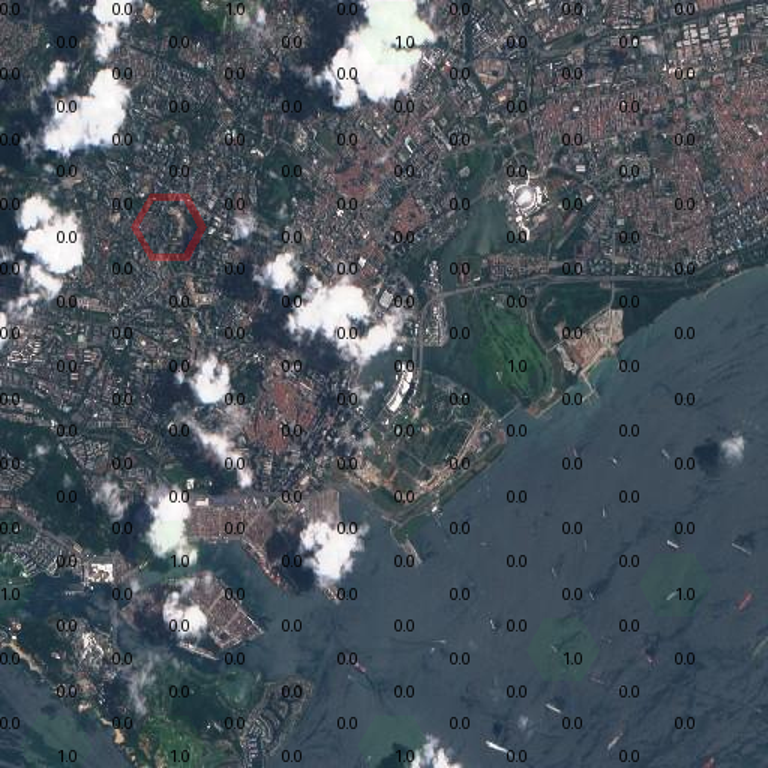

In [97]:
from PIL import Image, ImageDraw
from helper import hex_corner
import math
img = env.area.Input_Image.image.copy()

rew_norm = rew/rew.max()
for q in range(env.size_height):
      for r in range(env.size_width):
      
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            if((r,q) != (3,3)):
                  color_layer = Image.new('RGBA', img.size, (0,255,0))
                  alpha_mask = Image.new('L', img.size, 0)
                  alpha_mask_draw = ImageDraw.Draw(alpha_mask)
                  alpha_mask_draw.polygon(corners, outline="black", fill=round(100*(sucesses[q][r]/10)))
                  
                  img = Image.composite(color_layer, img, alpha_mask)
                  draw = ImageDraw.Draw(img)
                  draw.text((x,y), str(sucesses[q][r]), fill='black', align='center')
            else:
                  color_layer = Image.new('RGBA', img.size, (255,0,0))
                  alpha_mask = Image.new('L', img.size, 0)
                  alpha_mask_draw = ImageDraw.Draw(alpha_mask)
                  alpha_mask_draw.polygon(corners, outline="red", fill=None, width=5)
                  img = Image.composite(color_layer, img, alpha_mask)
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))

In [93]:
# env = enviorment.GPSD_ENV(landscape.images[2018], render='human', start_position=[1,1], target_position=[3,3])
# env.reset()
# env.render()
# input_text = ''
# while input_text == '':
#       action = int(model.predict(env._get_obs())[0])
#       print(action)
#       print(env._agent_location)
#       print(env.area.target_locatation)
      
#       input_text = input("Input")
#       observation, reward, terminated, k, info = env.step(action)
#       print(terminated)
#       if(terminated):
#             input_text='ji'
# env.close()